## Dependências

In [183]:
# import packages
import pandas as pd # dataframes
import matplotlib.pyplot as plt # plotting data
import geobr
import matplotlib.pyplot as plt
states = geobr.read_state(year=2019)
import warnings
warnings.filterwarnings('ignore')

## Brazil Corona Data

In [184]:
# import directly from GitHub
corona_df = pd.read_csv("https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv")

# change date column to datetime format
corona_df['date'] = pd.to_datetime(corona_df['date'])

# print all available columns
print(corona_df.columns)

Index(['epi_week', 'date', 'country', 'state', 'city', 'newDeaths', 'deaths',
       'newCases', 'totalCases', 'deathsMS', 'totalCasesMS',
       'deaths_per_100k_inhabitants', 'totalCases_per_100k_inhabitants',
       'deaths_by_totalCases', 'recovered', 'suspects', 'tests',
       'tests_per_100k_inhabitants', 'vaccinated',
       'vaccinated_per_100_inhabitants', 'vaccinated_second',
       'vaccinated_second_per_100_inhabitants', 'vaccinated_single',
       'vaccinated_single_per_100_inhabitants', 'vaccinated_third',
       'vaccinated_third_per_100_inhabitants'],
      dtype='object')


In [185]:
# Total
corona_df_total = corona_df.query("state != 'TOTAL'")[['date', 'state', 'newDeaths', 'newCases', 'totalCases', 'deaths', 'suspects', 'recovered', 'tests', 'vaccinated', 'vaccinated_second', 'vaccinated_per_100_inhabitants']]
corona_df_total = corona_df_total.sort_values(['date', 'state'])

In [186]:
corona_df_total_month1 = corona_df_total.groupby([corona_df_total['date'].dt.strftime('%y-%m'), 'state'])[["newDeaths", "newCases"]].sum()
corona_df_total_month2 = corona_df_total.groupby([corona_df_total['date'].dt.strftime('%y-%m'), 'state'])[["vaccinated_per_100_inhabitants"]].max()
corona_df_total_montn = pd.merge(corona_df_total_month1, corona_df_total_month2, on=["date", "state"])
corona_df_total_montn

newDeaths  newCases  vaccinated_per_100_inhabitants
date  state                                                     
20-02 SP             0         2                             NaN
20-03 AC             0        42                             NaN
      AL             1        18                             NaN
      AM             3       175                             NaN
      AP             0        10                             NaN
...                ...       ...                             ...
23-01 RS           196     41201                        86.46229
      SC            32     13603                        88.00576
      SE            14      1055                        87.46502
      SP           329     61677                        94.03006
      TO            12      3690                        74.83759

[946 rows x 3 columns]

In [187]:
# SP
# filter data for Brazil, and show only the specified columns
corona_df_sp = corona_df.query("state == 'SP'")[['date', 'state', 'newDeaths', 'newCases', 'totalCases', 'deaths', 'suspects', 'recovered', 'tests', 'vaccinated', 'vaccinated_second']]
corona_df_sp = corona_df_sp.sort_values(['date'])

# create new columns
corona_df_sp['activeCases'] = corona_df_sp['totalCases'] - corona_df_sp['deaths'] - corona_df_sp['recovered']
corona_df_sp['newVaccinated'] = corona_df_sp['vaccinated'].diff()
corona_df_sp['newVaccinated_second'] = corona_df_sp['vaccinated_second'].diff()

In [188]:
corona_df_sp_by_month1 = corona_df_sp.groupby([corona_df_sp['date'].dt.strftime('%y-%m')])[["newDeaths", "newCases"]].sum().reset_index()
corona_df_sp_by_month2 = corona_df_sp.groupby([corona_df_sp['date'].dt.strftime('%y-%m')])[["vaccinated"]].max().reset_index()
corona_df_sp_by_month = pd.merge(corona_df_sp_by_month1, corona_df_sp_by_month2, on="date")
corona_df_sp_by_month

,date,newDeaths,newCases,vaccinated
0,20-02,0,2,NaN
1,20-03,136,2337,NaN
2,20-04,2239,26359,NaN
3,20-05,5240,81000,NaN
4,20-06,7148,171682,NaN
5,20-07,8234,260924,NaN
6,20-08,7017,262038,NaN
7,20-09,5608,181286,NaN
8,20-10,3689,130499,NaN
9,20-11,2784,125526,NaN


### Analysis by month

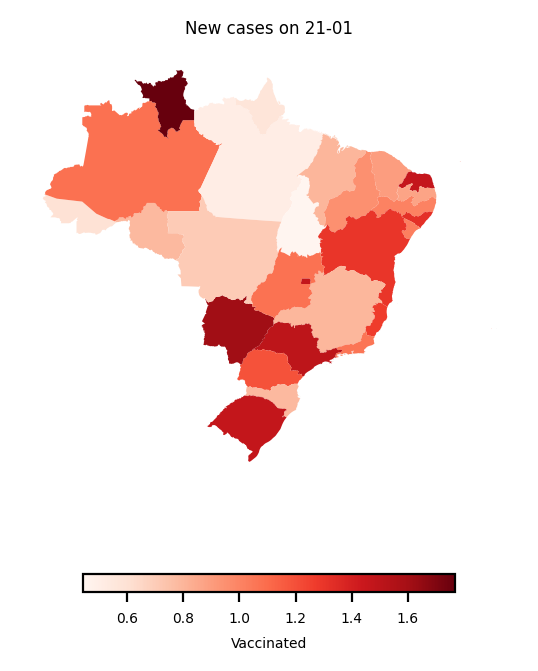

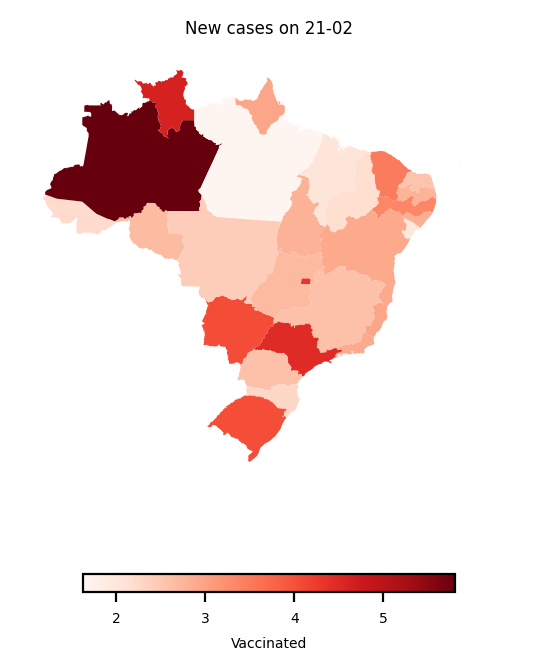

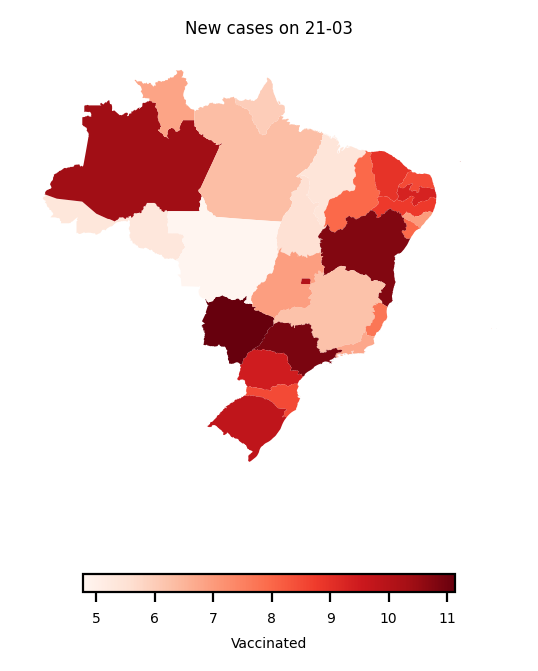

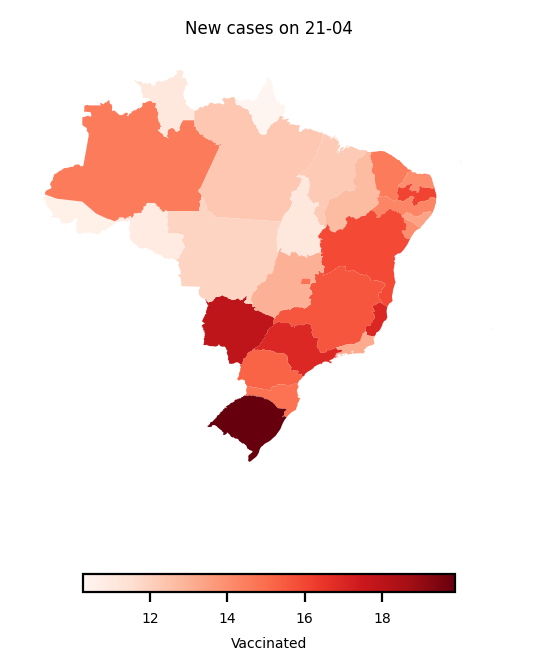

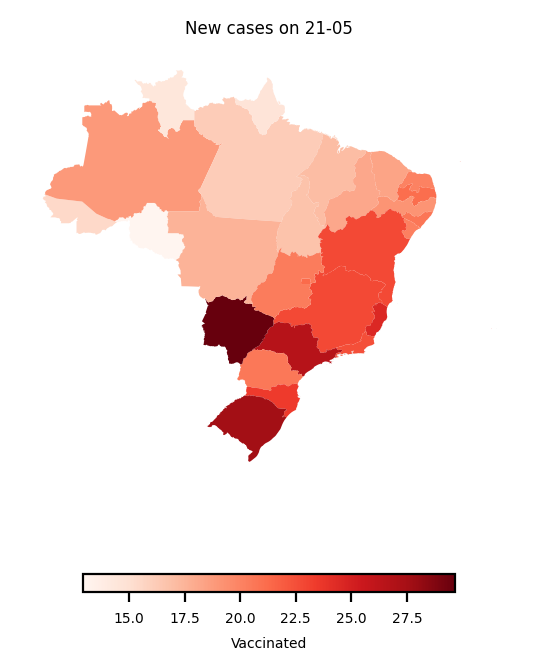

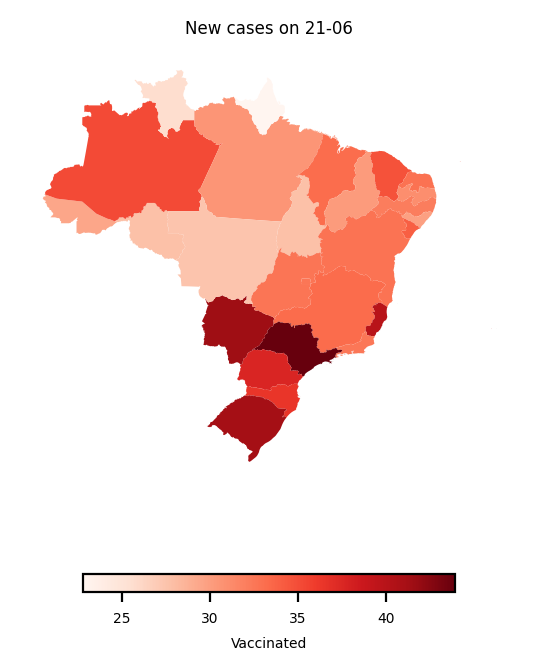

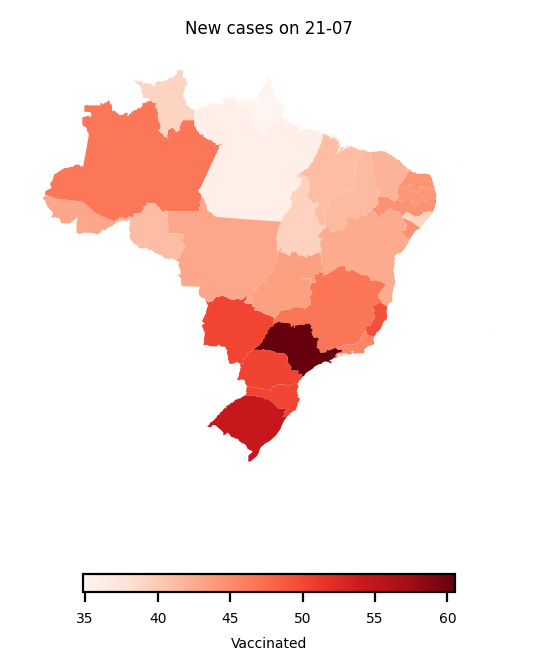

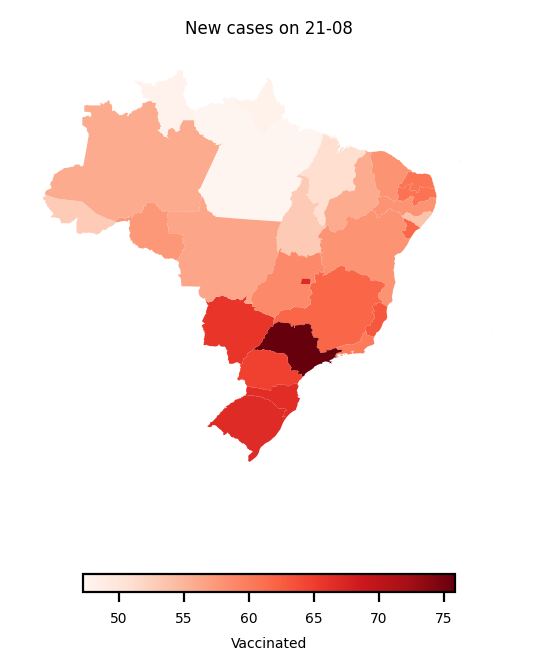

In [189]:
col = "vaccinated_per_100_inhabitants"
for i in range(8):
    month = f"22-0{i+1}"
    corona_month = corona_df_total_montn.xs(month, level="date").reset_index()
    corona_month['deaths_per_cases'] = corona_month["newDeaths"]/corona_month["newCases"]
    corona_month

    states["abbrev_state"] = states["abbrev_state"].str.lower()
    corona_month["state"] = corona_month["state"].str.lower()
    # join the databases
    corona_states = states.merge(corona_month, how="left", left_on="abbrev_state", right_on="state")

    plt.rcParams.update({"font.size": 5})

    fig, ax = plt.subplots(figsize=(4, 4), dpi=200)

    corona_states.plot(
        column=col,
        cmap="Reds",
        legend=True,
        legend_kwds={
            "label": "Vaccinated",
            "orientation": "horizontal",
            "shrink": 0.6,
        },
        ax=ax,
    )

    ax.set_title(f"New cases on {month}")
    ax.axis("off")

## São Paulo Weather Data

In [190]:
sp_weather_df = pd.read_csv("Sao Paulo,Brazil 2020-02-25 to 2022-11-20.csv")

In [191]:
sp_weather_df = sp_weather_df.groupby([pd.to_datetime(sp_weather_df['datetime']).dt.strftime("%y-%m") ])[['temp']].mean().reset_index()
sp_weather_df.head()

,datetime,temp
0,20-02,20.420000
1,20-03,21.377419
2,20-04,19.760000
3,20-05,17.532258
4,20-06,19.206667


In [195]:
join_temp_covid = pd.merge(corona_df_sp_by_month, sp_weather_df, how="inner", left_on="date", right_on="datetime")
join_temp_covid.head()

,date,newDeaths,newCases,vaccinated,datetime,temp
0,20-02,0,2,NaN,20-02,20.420000
1,20-03,136,2337,NaN,20-03,21.377419
2,20-04,2239,26359,NaN,20-04,19.760000
3,20-05,5240,81000,NaN,20-05,17.532258
4,20-06,7148,171682,NaN,20-06,19.206667


<AxesSubplot: >

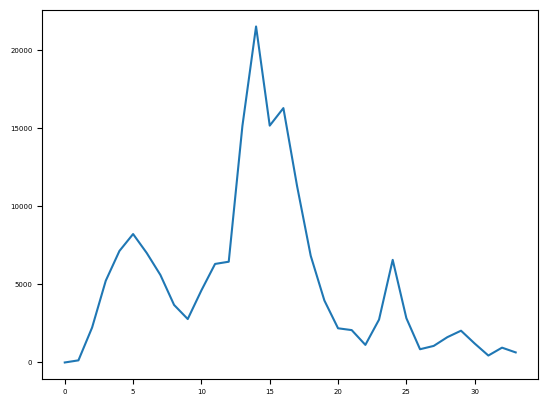

In [193]:
join_temp_covid["newDeaths"].plot()

## Casos por Temperatura

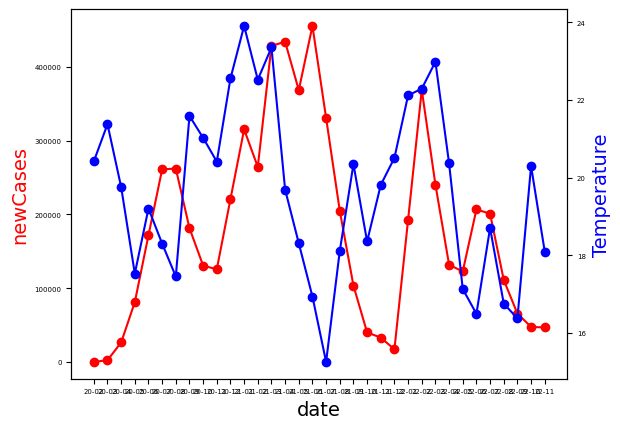

In [196]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(join_temp_covid["date"],
        join_temp_covid["newCases"],
        color="red", 
        marker="o")
# set x-axis label
ax.set_xlabel("date", fontsize = 14)
# set y-axis label
ax.set_ylabel("newCases",
              color="red",
              fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(join_temp_covid["date"], join_temp_covid["temp"],color="blue",marker="o")
ax2.set_ylabel("Temperature",color="blue",fontsize=14)
plt.show()


## Mortes por Vacinação

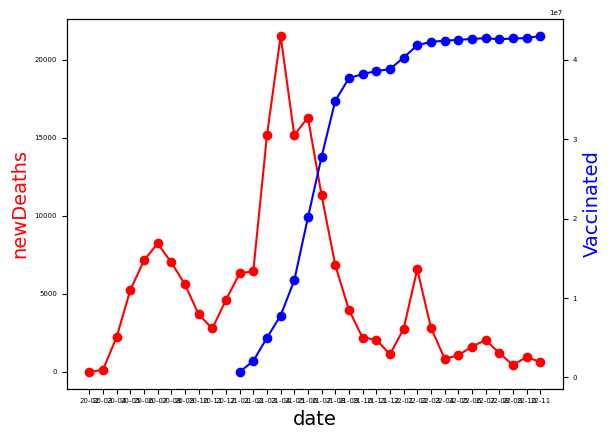

In [197]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(join_temp_covid["date"],
        join_temp_covid["newDeaths"],
        color="red", 
        marker="o")
# set x-axis label
ax.set_xlabel("date", fontsize = 14)
# set y-axis label
ax.set_ylabel("newDeaths",
              color="red",
              fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(join_temp_covid["date"], join_temp_covid["vaccinated"],color="blue",marker="o")
ax2.set_ylabel("Vaccinated",color="blue",fontsize=14)
plt.show()

## Impactos da COVID 19
Além dos impactos na saúde e no dia a dia das pessoas, a pandemia de COVID 19 trouxe impactos severos no contexto econômico e de geração de empregos no Brasil. Um cenário crescente de contágios e mortes pela doença, associado a diversas medidas de restrição à movimentação de pessoas e a um profundo cenário de incertezas resultou em graves consequências, de curto e médio prazo. A primeira delas foi sentida no mercado acionário brasileiro, conforme podemos observar abaixo:

In [1]:
!pip install yfinance

Defaulting to user installation because normal site-packages is not writeable

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
geoplot 0.5.1 requires geopandas>=0.9.0, but you have geopandas 0.7.0 which is incompatible.
conda-repo-cli 1.0.20 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.20 requires nbformat==5.4.0, but you have nbformat 5.5.0 which is incompatible.



     -------------------------------------- 51.4/51.4 kB 438.1 kB/s eta 0:00:00
     -------------------------------------- 499.4/499.4 kB 2.1 MB/s eta 0:00:00
     -------------------------------------- 112.2/112.2 kB 6.4 MB/s eta 0:00:00


In [17]:
import yfinance as yf
data = yf.download("AMER3.SA", period='1mo', interval='1h')
ibov = yf.download('^BVSP', start = '2016-01-01', end = '2022-12-31', interval = '1wk')
ibov

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-01 00:00:00-02:00,43349.0,43349.0,40695.0,40695.0,40695.0,13501700
2016-01-08 00:00:00-02:00,40695.0,41218.0,38459.0,39500.0,39500.0,17129900
2016-01-15 00:00:00-02:00,39494.0,39494.0,37046.0,37717.0,37717.0,17014500
2016-01-22 00:00:00-02:00,37737.0,39100.0,37112.0,38630.0,38630.0,16917700
2016-01-29 00:00:00-02:00,38635.0,41444.0,38596.0,40822.0,40822.0,23189300
...,...,...,...,...,...,...
2022-11-25 00:00:00-03:00,111831.0,112486.0,108378.0,110926.0,110926.0,73420300
2022-12-02 00:00:00-03:00,110926.0,113761.0,106906.0,107245.0,107245.0,70474200
2022-12-09 00:00:00-03:00,107250.0,108566.0,101632.0,103738.0,103738.0,84352100


In [18]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Candlestick(
    x = ibov.index,
    open = ibov.Open,
    close = ibov.Close,
    high = ibov.High,
    low = ibov.Low
))

fig.update_layout(
    xaxis_title='Tempo (semanas)',
    yaxis_title='Índice IBOV'
)

É possível observar que o recuo do Índive Bovespa (IBOV) caiu vertiginosamento no início da pandemia no Brasil (Março de 2020), voltando a patamares de 2017, retrocedento um ciclo de alta que ocorria desde 2016.
Além dos impactos no mercado de ações, os brasileiros sentiram um grande impacto na inflação e na taxa básica de juros, a Selic.

In [38]:
# Lets define a function to import data from their database
def consulta_bc(codigo_bcb):
  url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bcb)
  df = pd.read_json(url)
  df['data'] = pd.to_datetime(df['data'], dayfirst=True)
  df.set_index('data', inplace=True)
  return df

ipca  = consulta_bc(433)
selic = consulta_bc(1178)

ipca  = ipca.loc['2019-01-01':'2022-12-31']
selic = selic.loc['2019-01-01':'2022-12-31']

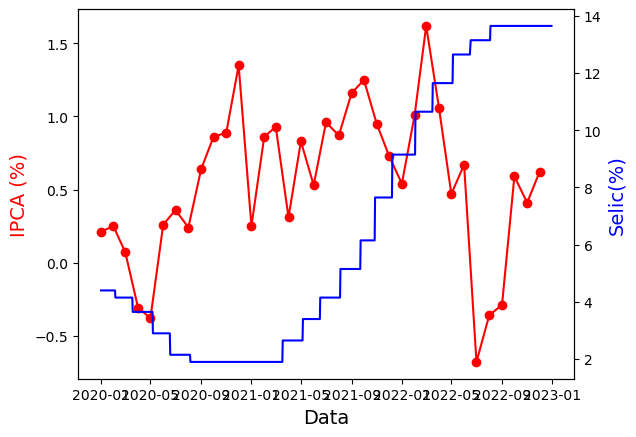

In [39]:
# Create figure and axis objects with subplots()
fig,ax = plt.subplots()
# Make a plot
ax.plot(ipca.index,
        ipca["valor"],
        color="red",
        marker = "o"
       )
# set x-axis label
ax.set_xlabel("Data", fontsize = 14)
# set y-axis label
ax.set_ylabel("IPCA (%)",
              color="red",
              fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(selic.index,
         selic["valor"],
         color="blue",
        )
ax2.set_ylabel("Selic(%)",color="blue",fontsize=14)
plt.show()

A partir dos dados de inflação e juros, é possível perceber que há um crescimento acentuado da inflação ao longo do ano de 2021 e que se mantém alta (em torno de 0,5% a.m.) até meados de 2022. Neste mesmo período, a taxa Selic subiu vertiginosamente para controlar a inflação, chegando a 14% a.a. Deste modo, houve uma acetuada inflação acompanhada por uma alta de juros que aumentou o custo de crédito para os brasileiros, dificultando investimentos e aumentando dívidas de famílias e empresas.

Por fim, mas não menos importante, a pandemia afetou a geração de empregos. Dados encontrados na base de dados do Instituto de Pesquisa Econômica Aplicada (Ipea) mostram que logo no ínicio da pandemia, houve uma redução bastante significativa no saldo de empregos formais criados no Brasil (fonte: Novo Caged)

In [45]:
saldoEmprego = pd.read_csv("ipeadata[19-01-2023-10-59].csv", names = ['Data', 'Saldo'], usecols = [0, 1], header = 0)
saldoEmprego

,Data,Saldo
0,2020.01,92678
1,2020.02,198368
2,2020.03,-232316
3,2020.04,-902317
4,2020.05,-352790
5,2020.06,-23111
6,2020.07,123297
7,2020.08,238125
8,2020.09,313564
9,2020.10,388938


<AxesSubplot:>

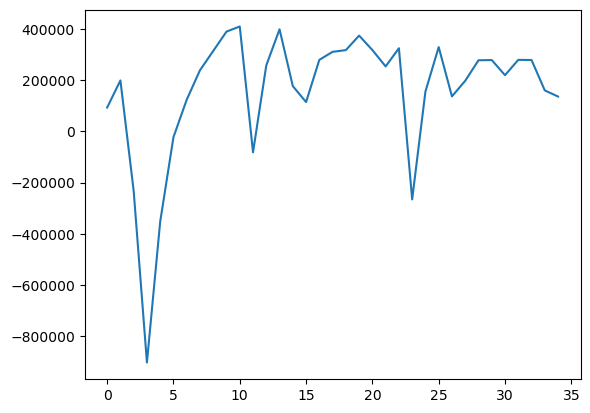

In [49]:
saldoEmprego['Saldo'].plot()